# Analysing a pendulum system

## Content
- Dynamics of a 10-chain system
- Varying the number of masses in the system
- Varying initial conditions of the system
- Analysing the maximum chain energy of the system
- Distribution of Angles
- Statistically Steady State Analysis
- Return Time

In [1]:
from Assignment2 import RK45, chain_plot, Chain
from Task2 import plot_properties, plot_histogram, compute_moving_average
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

## Dynamics of a 10-chain system

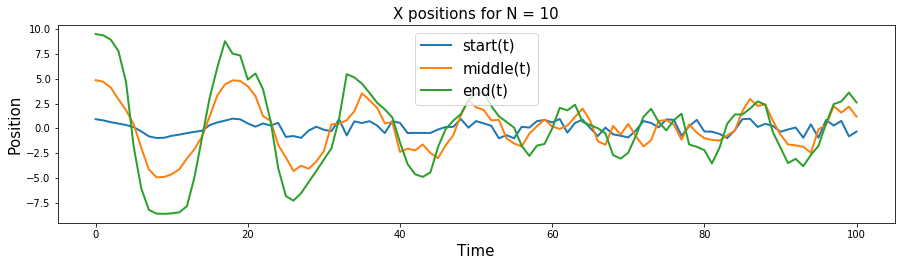

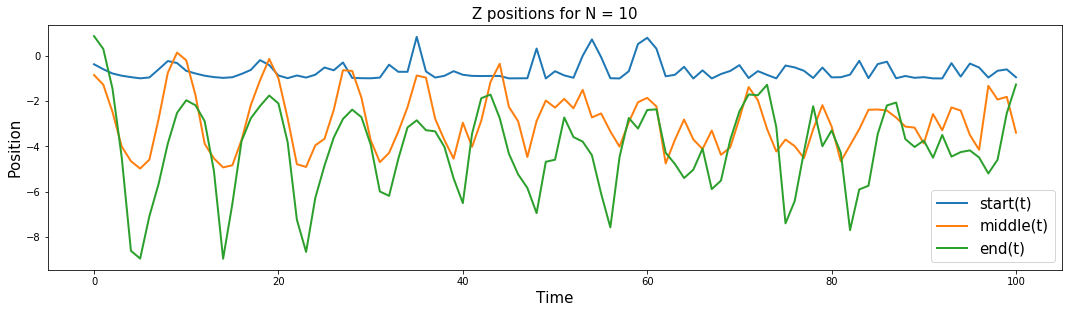

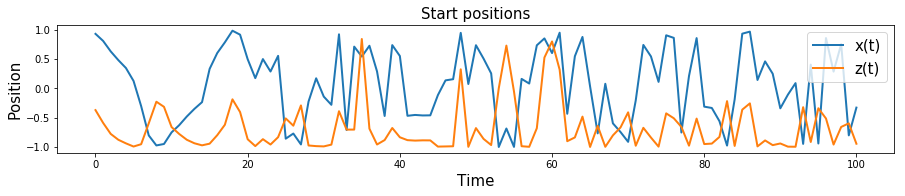

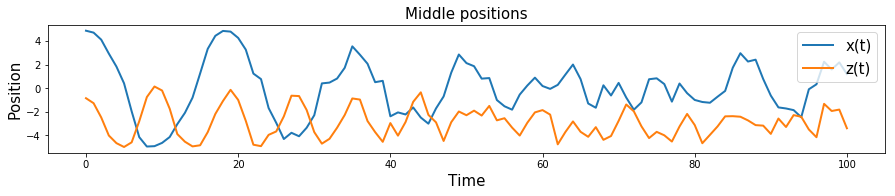

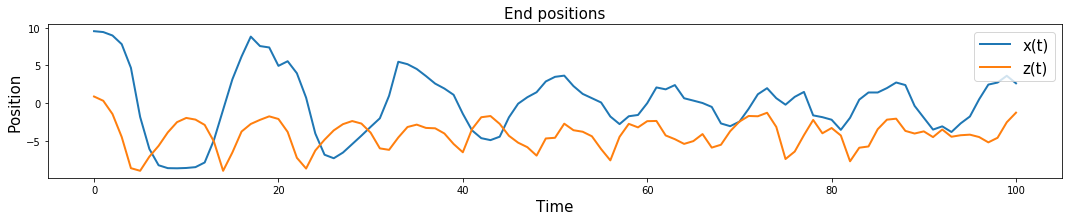

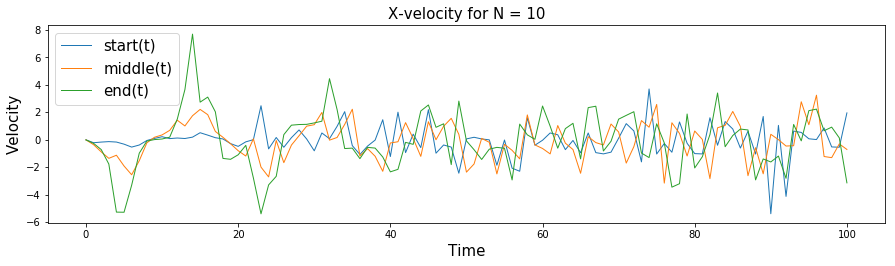

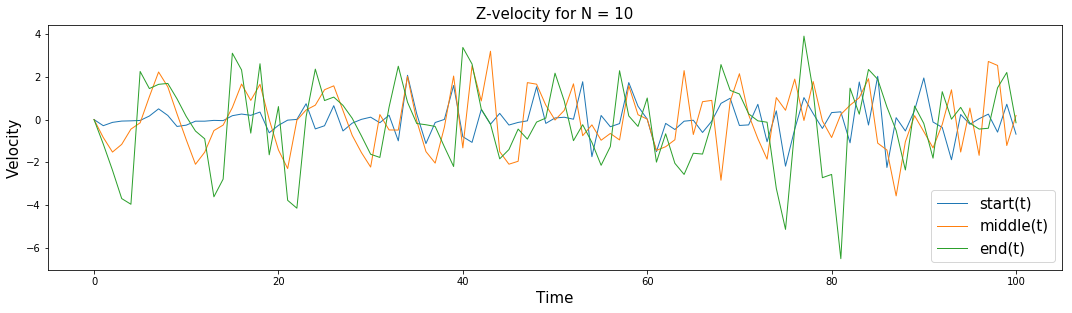

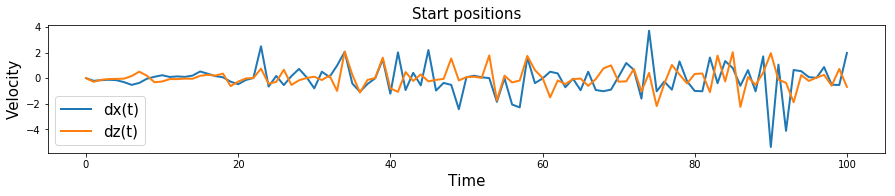

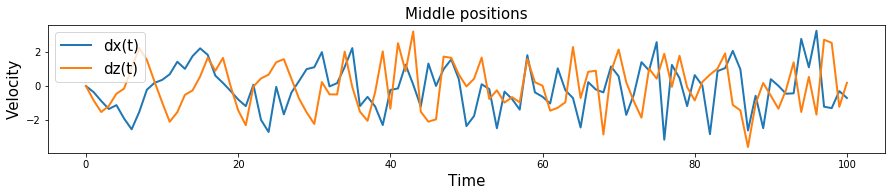

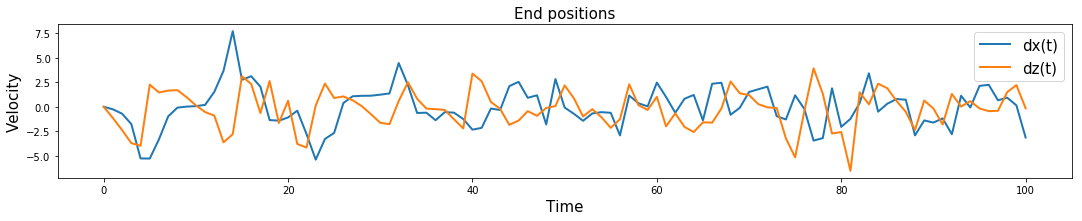

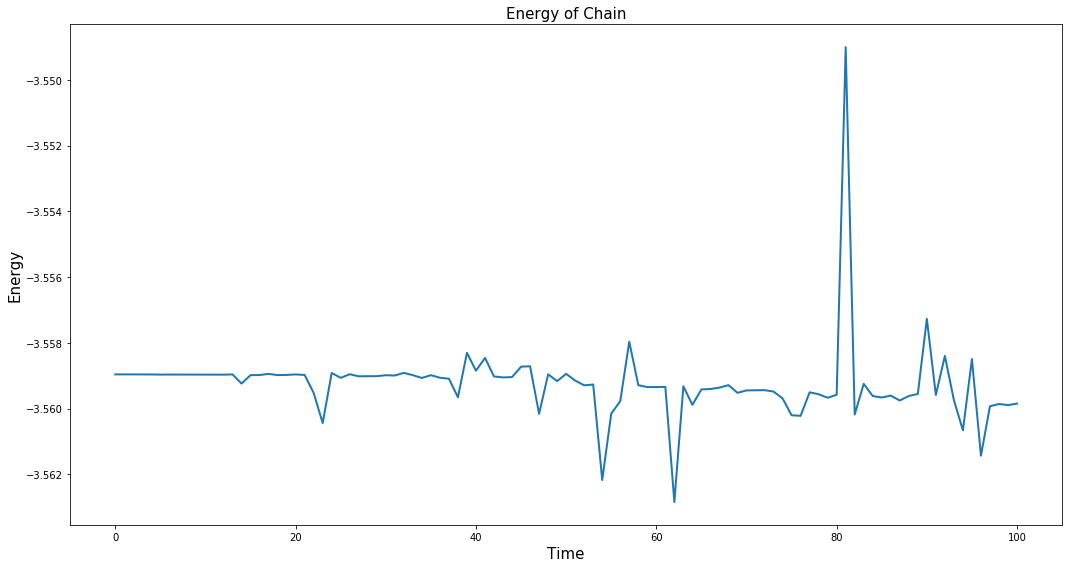

In [2]:
def Analyse(prop,N,a,b,compare=False,cond='both'):
    """
    Plot the position, velocity, or energy of the system.
    
    Parameters:
    --------
    prop: str
        The phenomena to observe
    n: int
        The number of mass points in pendulum.
    a, b: int
        Parameters for initial condition of the system.
    
    Return:
    --------
        Plots of the phenomena.
    """
    f = Chain(N)
    state = f.hanging_state(a,b)
    stepper = RK45(f,state)
    if compare:
        plot_properties(prop,f,state,stepper,N,True)
    else:
        if cond == 'x':
            plot_properties(prop,f,state,stepper,N,False,True,False)
        if cond == 'z':
            plot_properties(prop,f,state,stepper,N,False,False,True)
        if cond == 'both':
            plot_properties(prop,f,state,stepper,N,False)

Analyse('position',10,1,0.4)
Analyse('position',10,1,0.4,True)
Analyse('velocity',10,1,0.4)
Analyse('velocity',10,1,0.4,True)
Analyse('energy',10,1,0.4)

## Varying the number of masses in the system

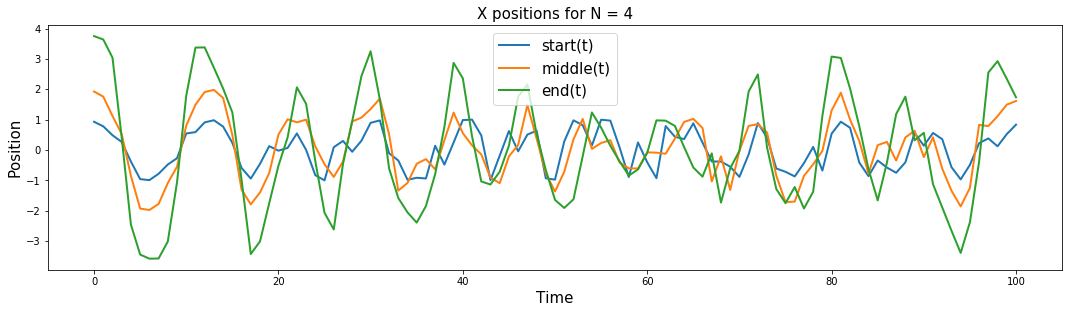

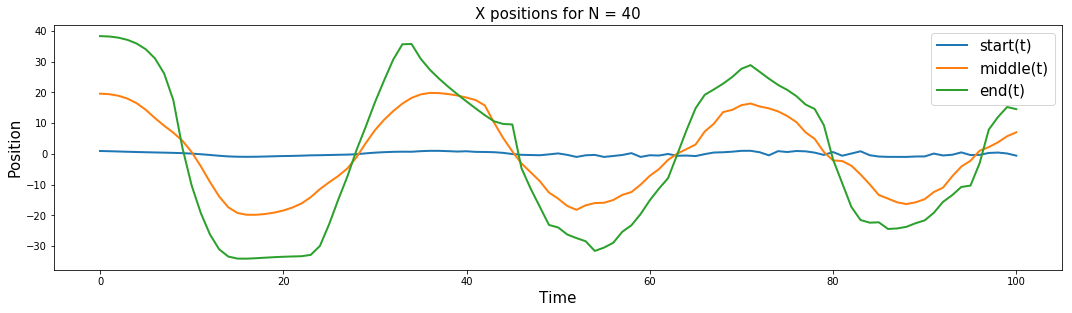

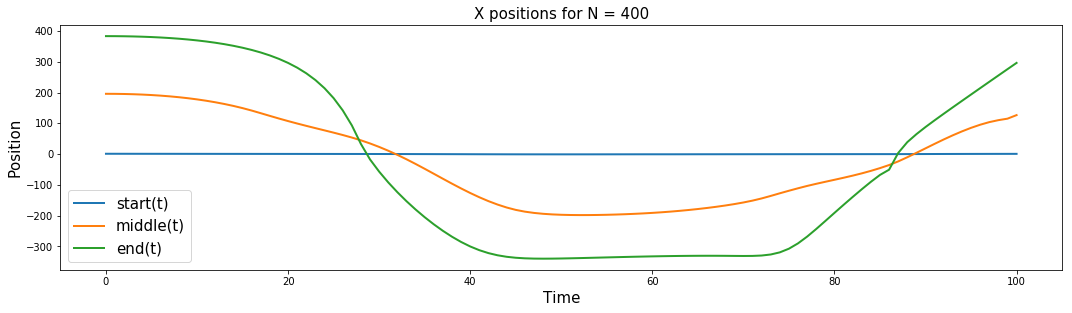

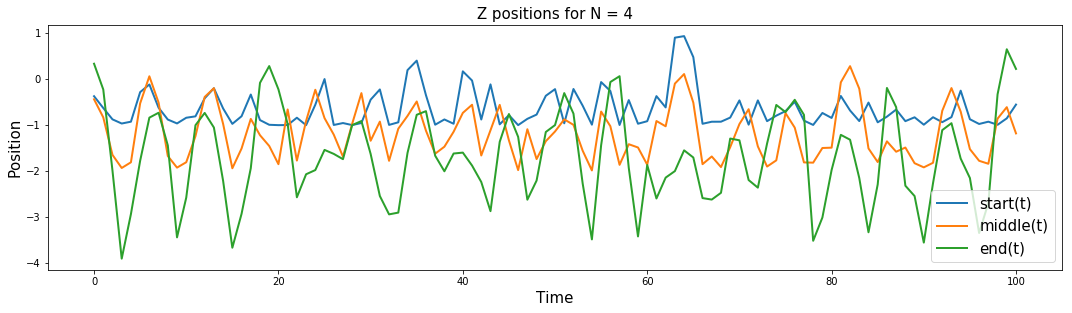

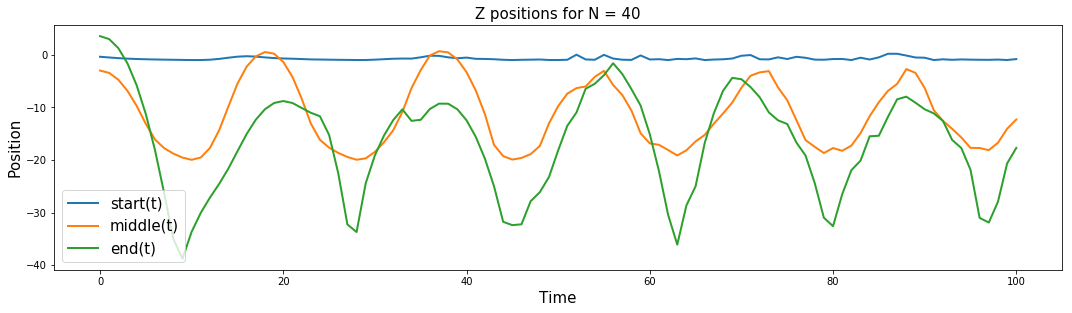

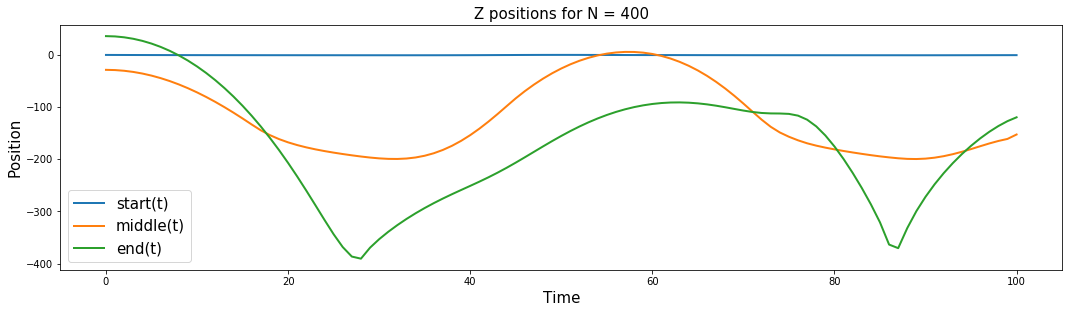

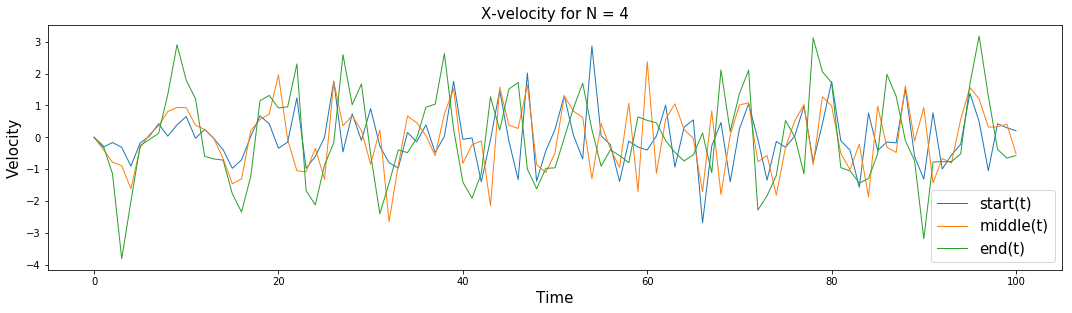

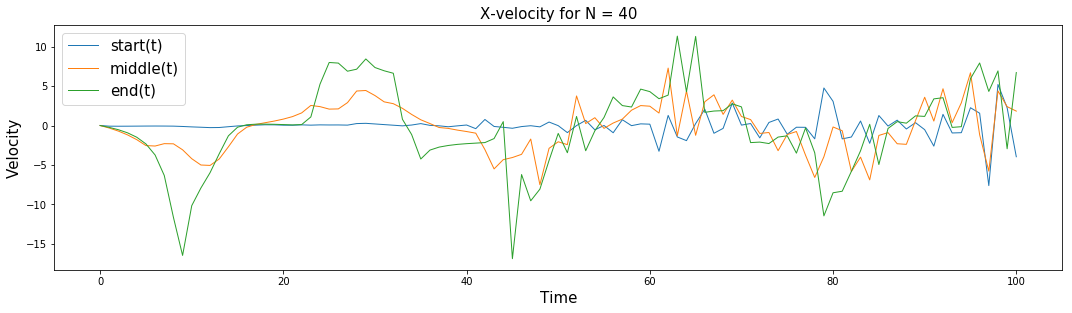

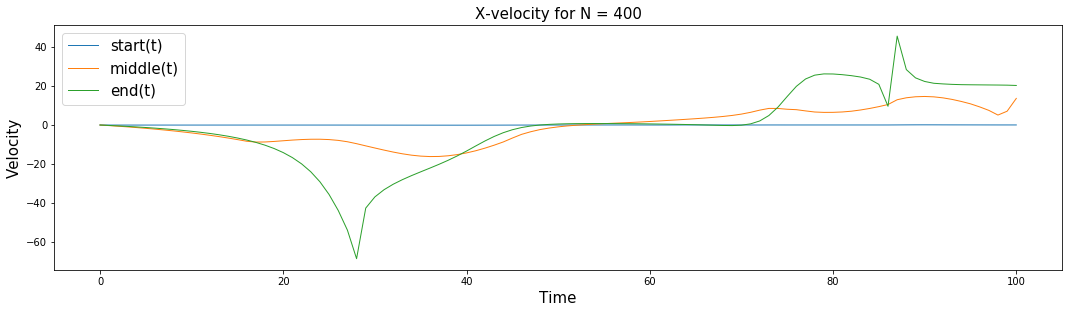

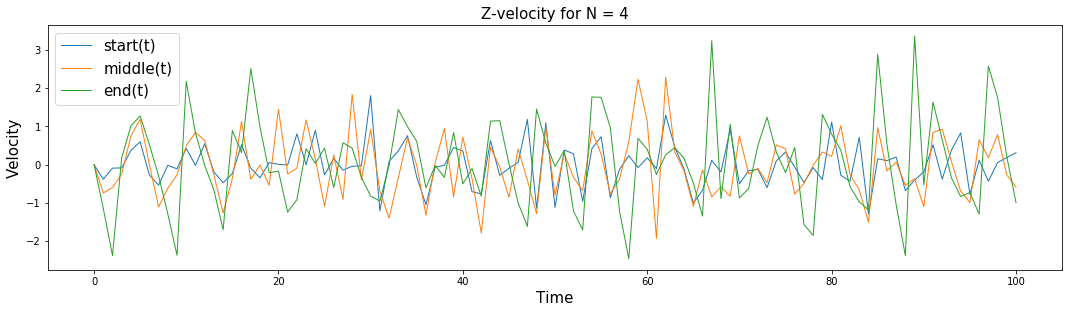

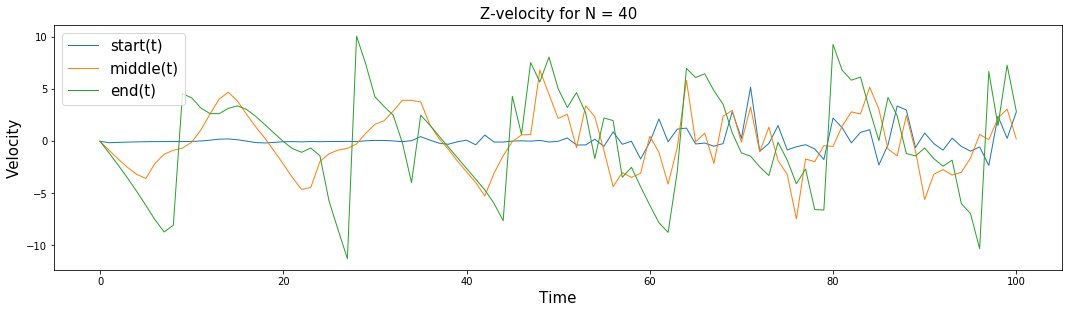

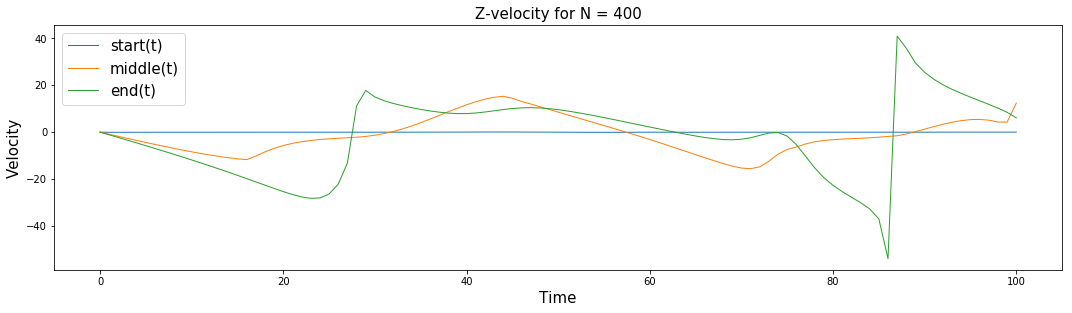

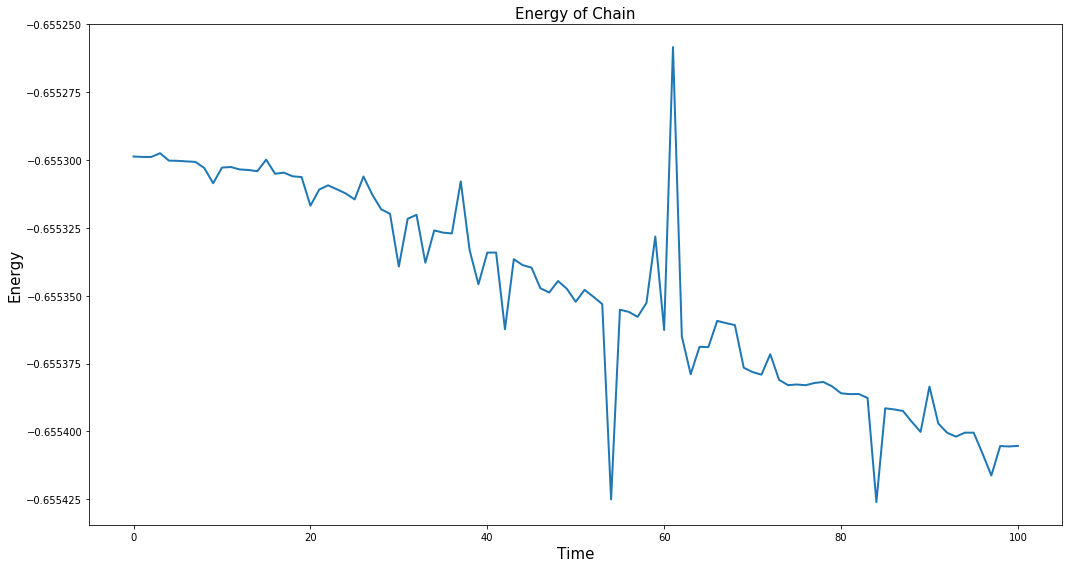

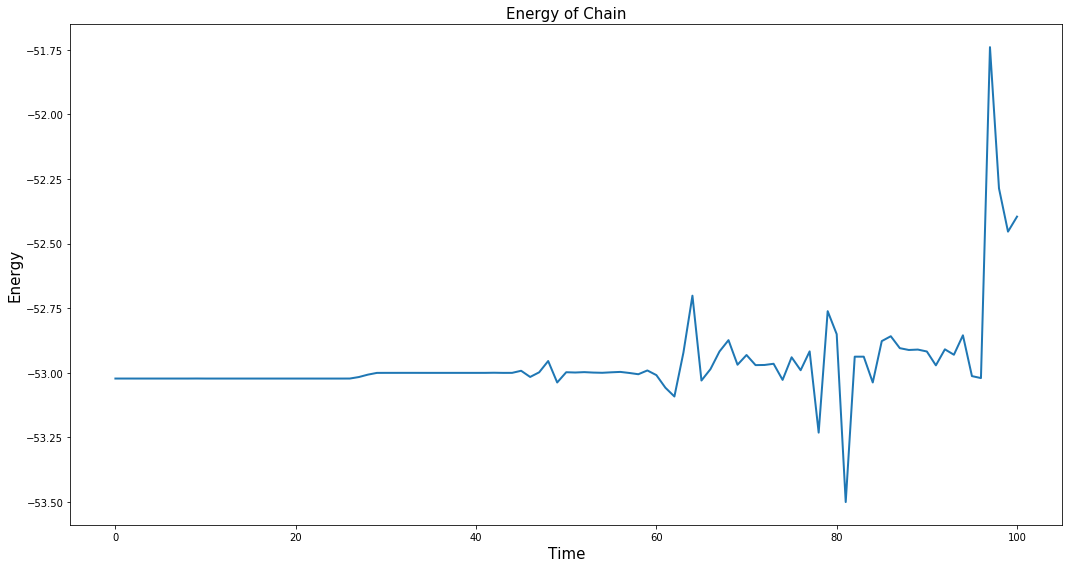

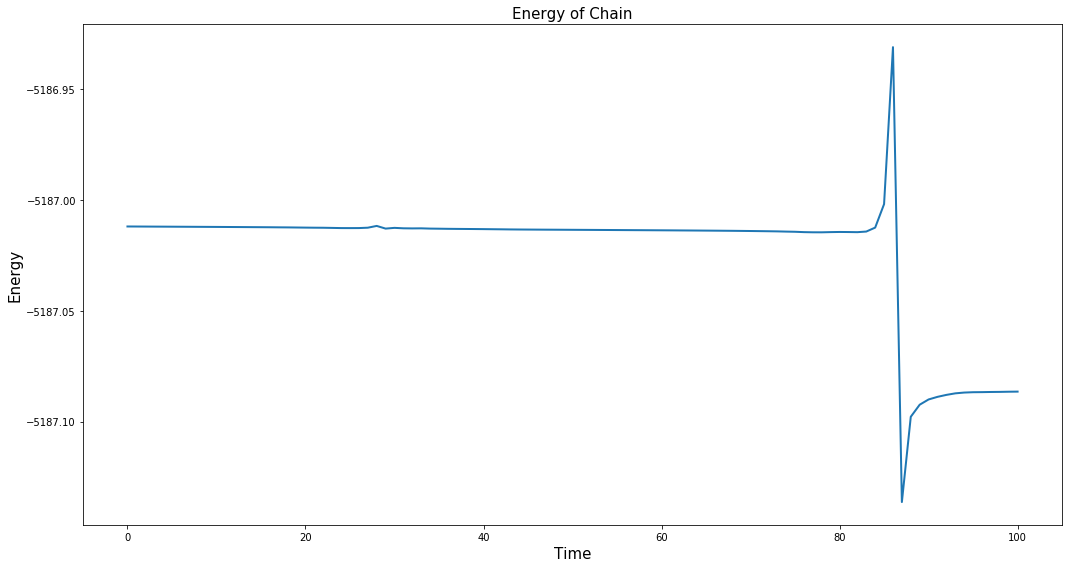

In [3]:
# Iterating through and varying the number of mass in the system.
for phenom in ['position','velocity']:
    for cond in (['x','z']):
        for i in ([4,40,400]):
            Analyse(phenom, i, 1, 0.4, False, cond)
        
for i in ([4,40,400]):
    Analyse('energy',i,1,0.4)

## Varying initial conditions of the system


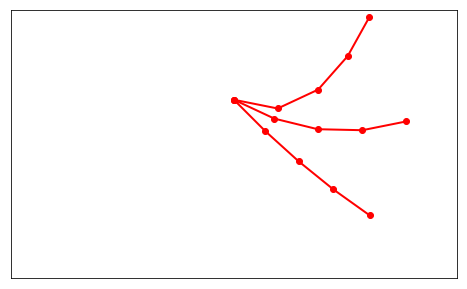

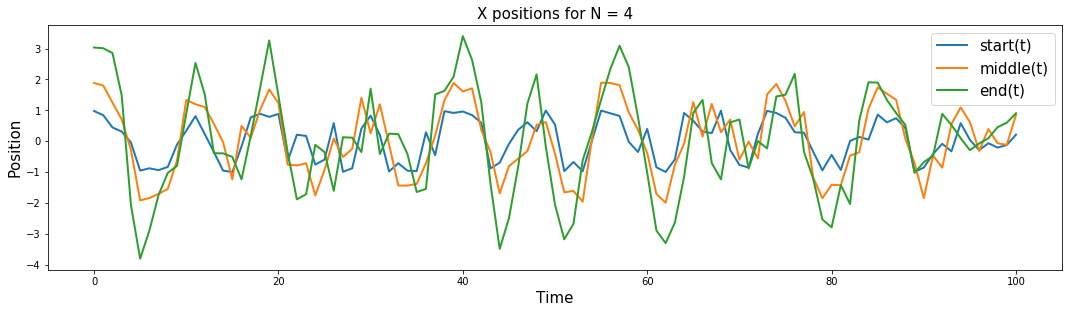

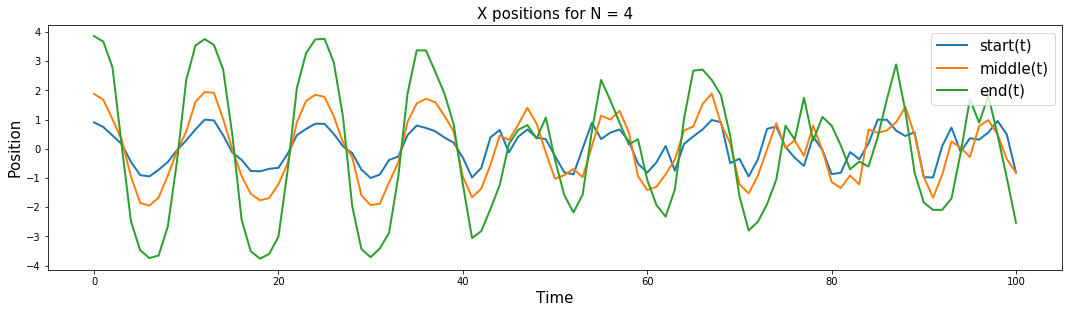

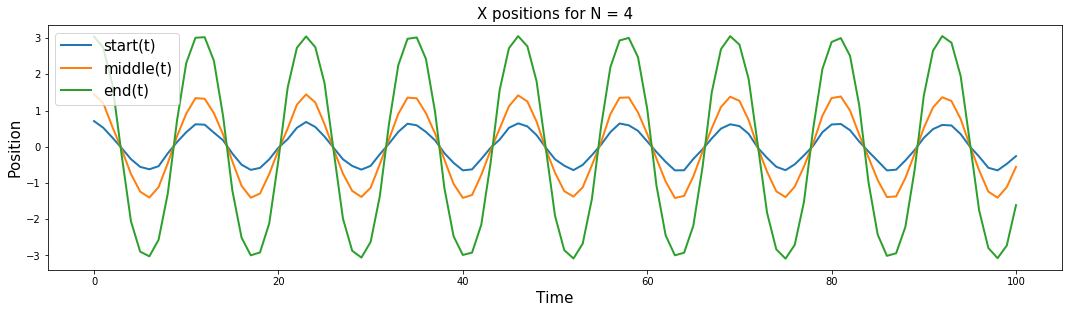

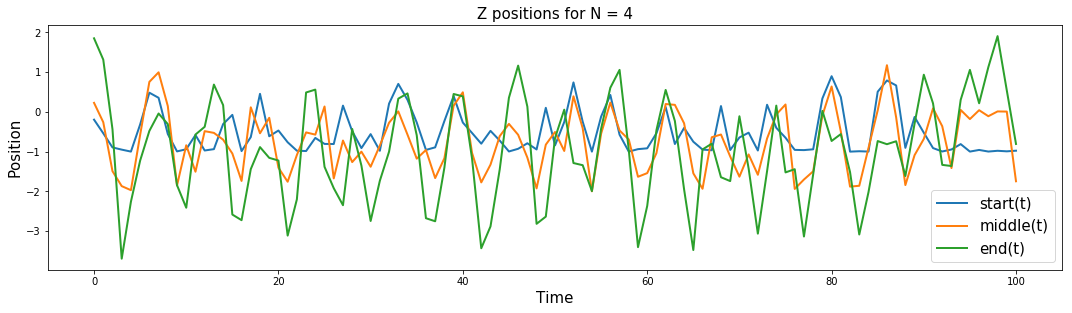

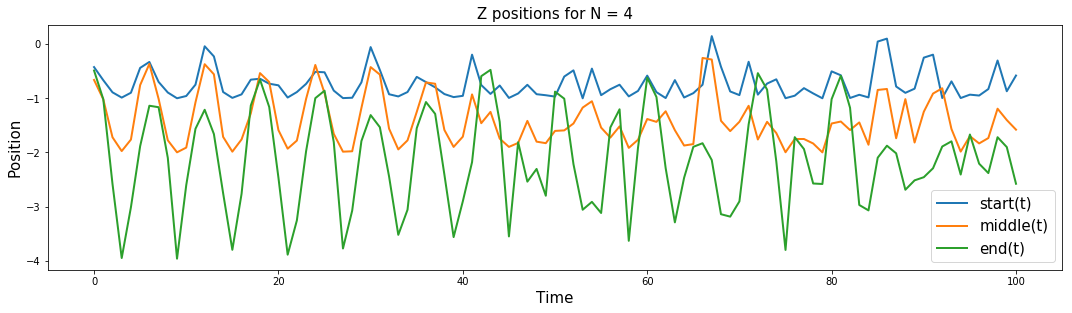

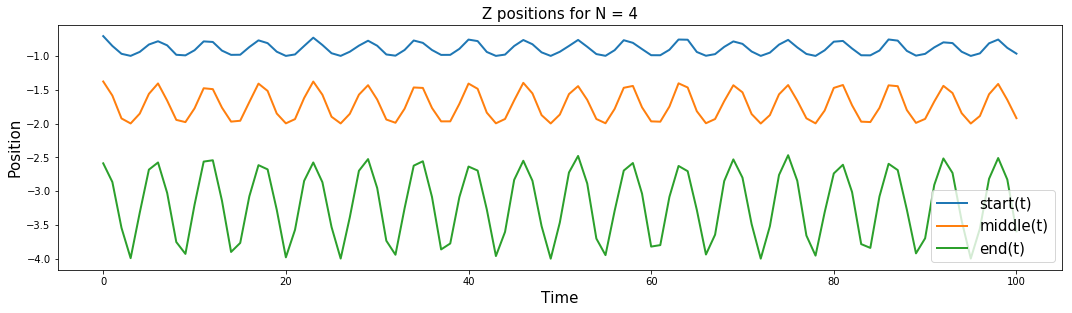

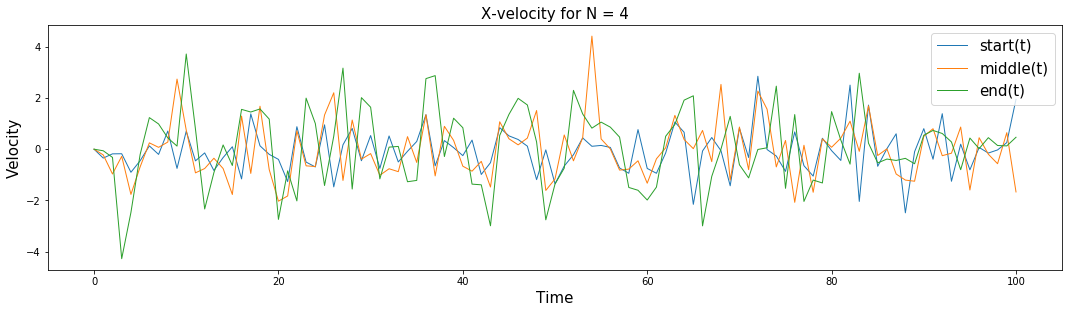

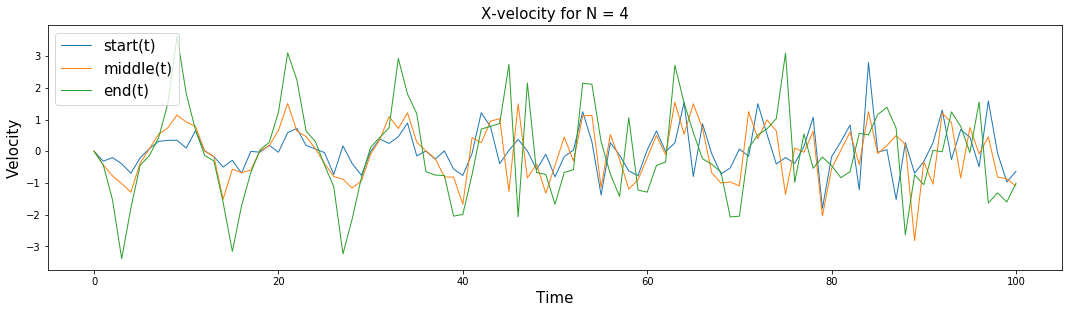

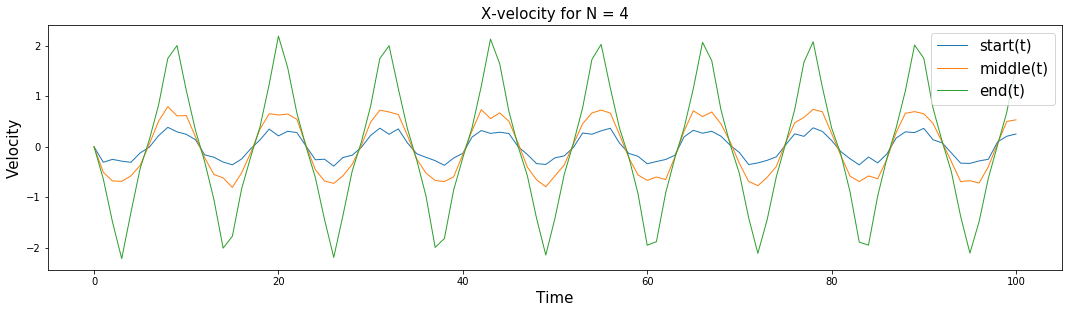

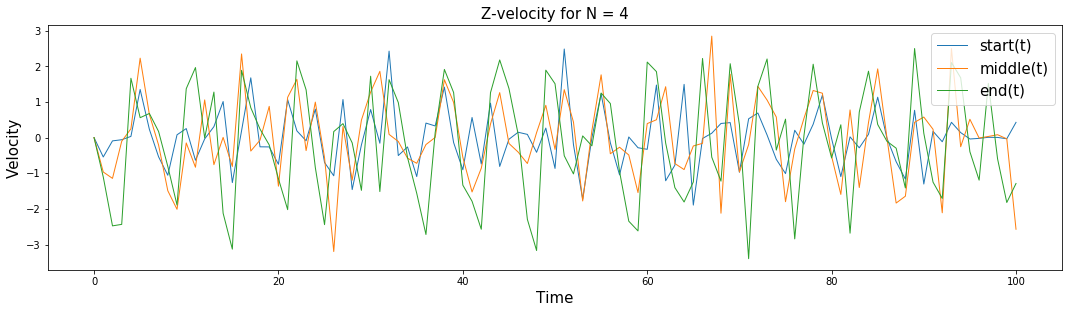

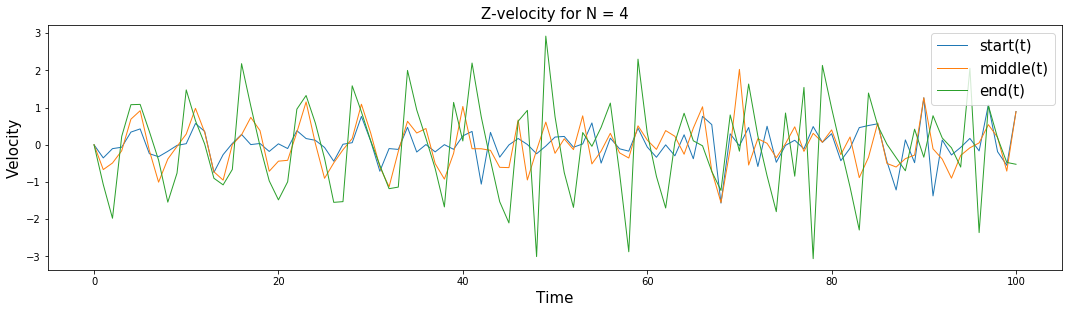

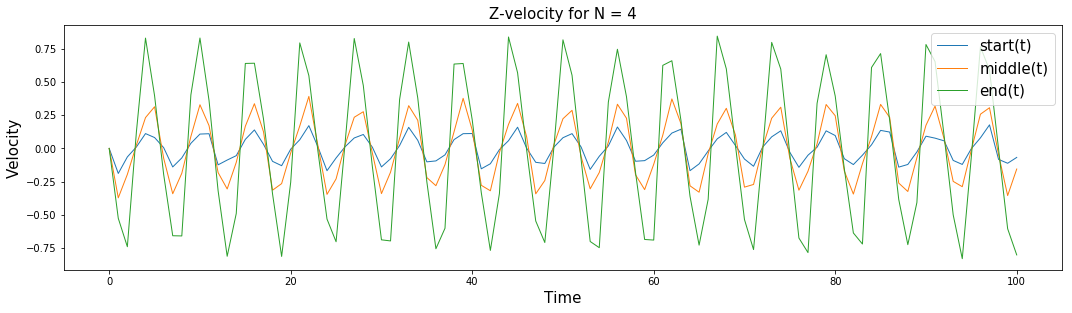

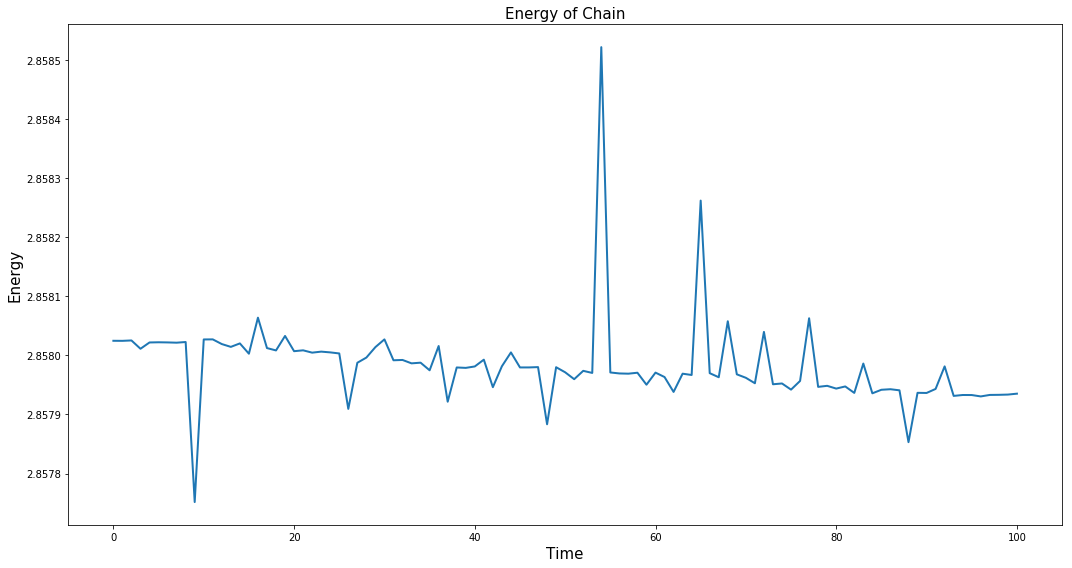

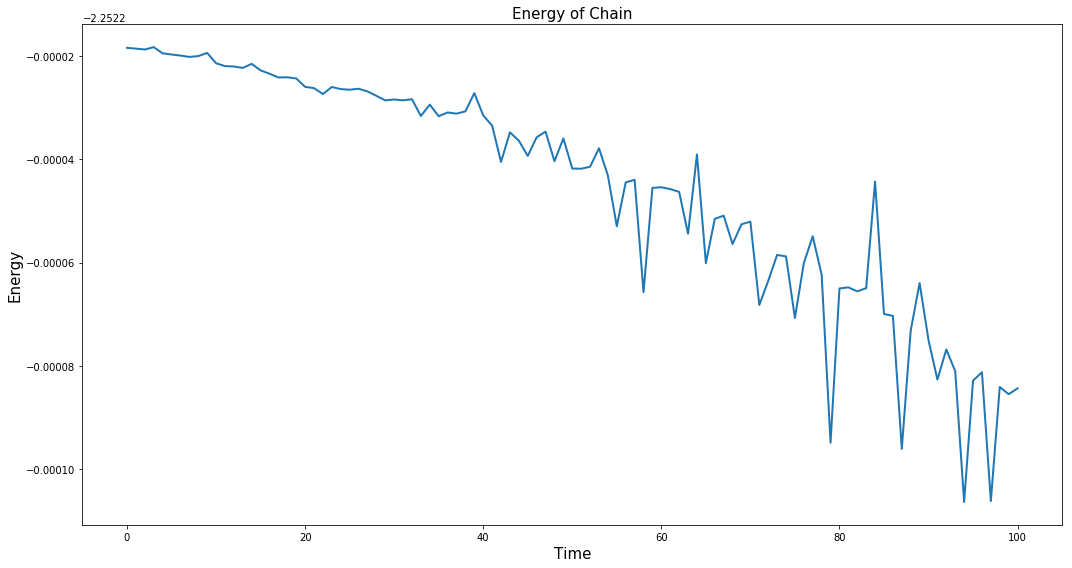

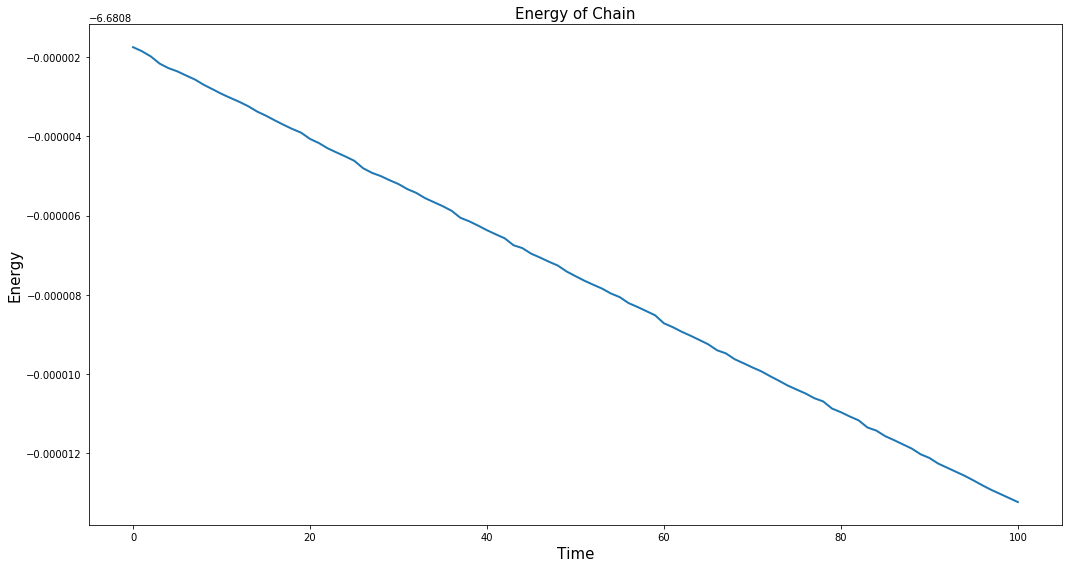

In [4]:
g = Chain(4)
x, y, state = [], [], []

pl = chain_plot(4)
for a,b in zip([0.5, 1.5, 3.5], [0.1, 0.7, 3.5]):
    state.append(g.hanging_state(a,b))

for i in [0,1,2]:
    g(state[i])
    x.append(g.retrieve_cartesian_coordinates()[0])
    y.append(g.retrieve_cartesian_coordinates()[1])
    pl(x[i],y[i])

for phenom in ['position','velocity']:
    for cond in (['x','z']):
        for a, b in zip([0.5, 1.5, 3.5], [0.1, 0.7, 3.5]): 
            # Dropping the chain from a progressively lower point.
            Analyse(phenom, 4, a, b, False, cond)

for a,b in zip([0.5,1.5,3.5],[0.1,0.7,3.5]):
    Analyse('energy',4,a,b,False)

## Analysing the maximum chain energy of the system
### Data
We observe the energy of a chain starting from a near vertical inital position, as this is predicted to perform the most 'chain snaps'. The initial position, position of the chain for positive time and energy of the chain for positive time is given below
<br>

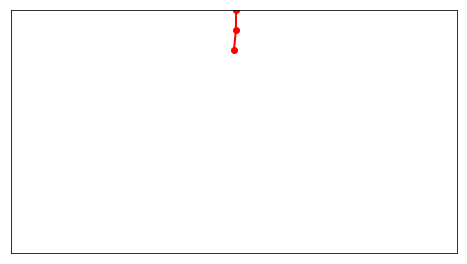

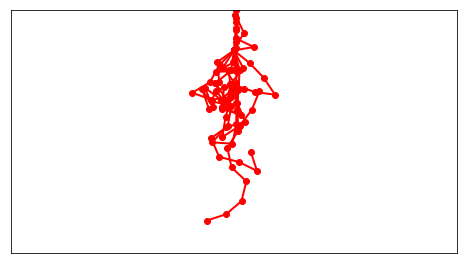

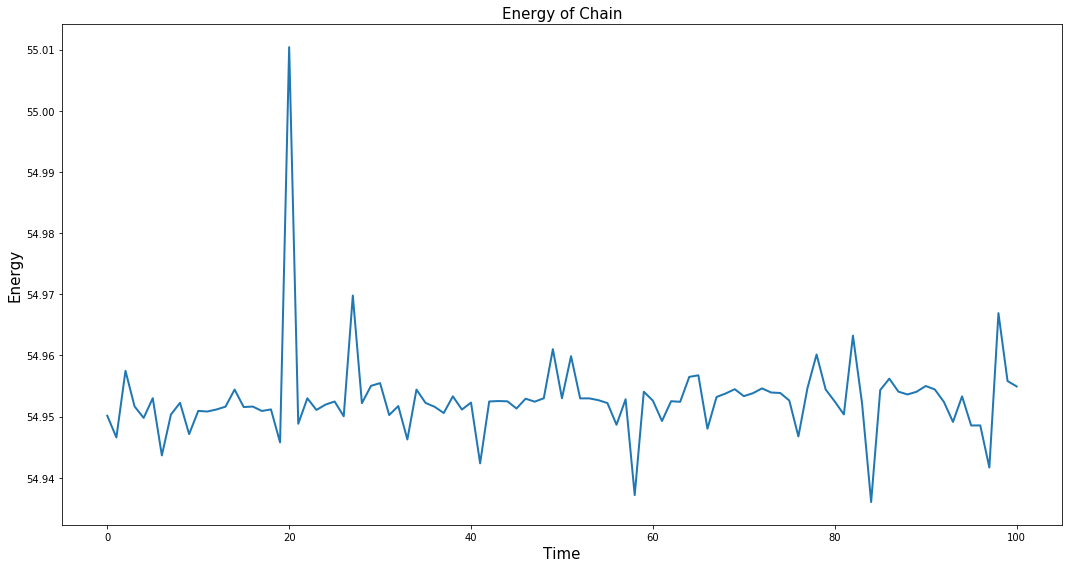

In [5]:
drop = Chain(10)
statee = drop.hanging_state(1e-3,-0.01)

initial = chain_plot(10)
x,y = drop.retrieve_cartesian_coordinates()
initial(x,y)

stepper = RK45(drop, statee)
T, dt, freq = 100000, 0.01, 100
X = np.zeros((1+int(T/dt)//freq, 2, 11))
X[0][:] = drop.retrieve_cartesian_coordinates()

count = 0 
while stepper.time < T or count < 100:
    stepper(dt)
    if stepper.iter % freq == 0:
        if count == 10: break
        out = stepper.iter//freq
        X[out][:] = drop.retrieve_cartesian_coordinates()
        count+=1

show = chain_plot(10)
for i in range(20):
    show(X[i][0], X[i][1])
    
    
plot_properties('energy',drop,statee,RK45(drop,statee),10,compare=False,x=True,z=True)


In comparison, the initial position in space and energy of a chain starting from a non-vertical initial position is given below. 

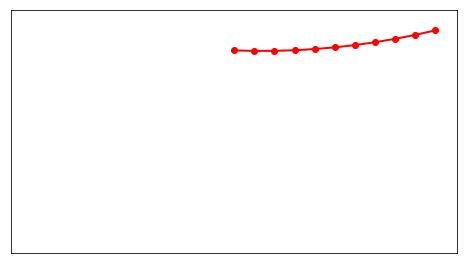

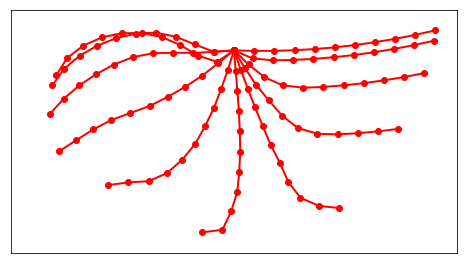

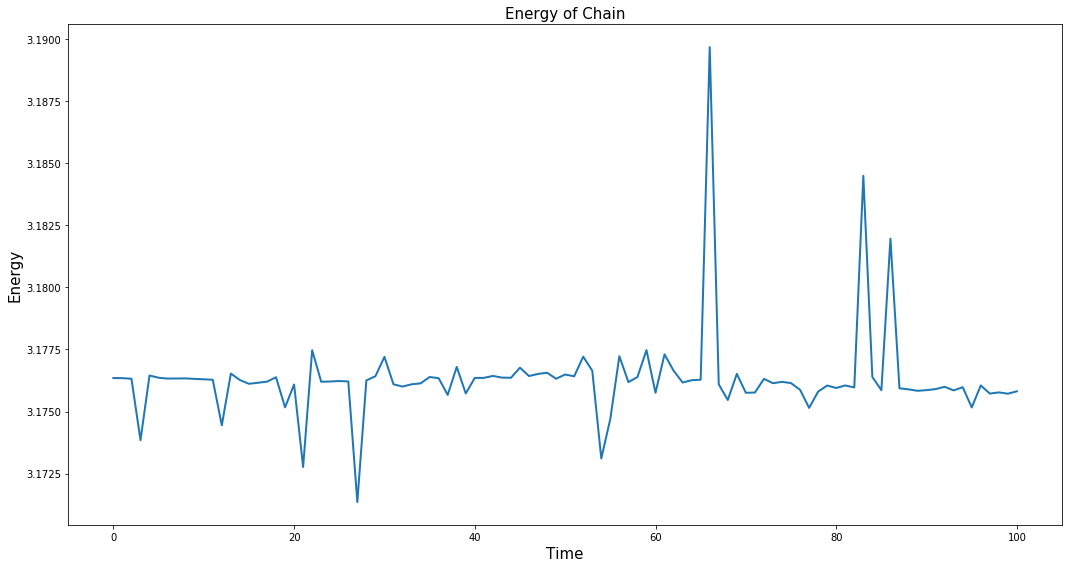

In [6]:
h = Chain(10)
hz = h.hanging_state(4,0.1)

initial = chain_plot(10)
x,y = h.retrieve_cartesian_coordinates()
initial(x,y)

stepper = RK45(h, hz)
T, dt, freq = 100000, 0.01, 100
X = np.zeros((1+int(T/dt)//freq, 2, 11))
X[0][:] = h.retrieve_cartesian_coordinates()

count = 0 
while stepper.time < T or count < 100:
    stepper(dt)
    if stepper.iter % freq == 0:
        if count == 10: break
        out = stepper.iter//freq
        X[out][:] = h.retrieve_cartesian_coordinates()
        count+=1

show = chain_plot(10)
for i in range(20):
    show(X[i][0], X[i][1])

plot_properties('energy',h,hz,RK45(h,hz),10)

## Distribution of angles

We look at the distribution of angles in the system after a certain time point T.

In [7]:
N = 10
f = Chain(N)
z = f.hanging_state(4, 0.1)
stepper = RK45(f, z)
T, dt, freq = 100000, 0.01, 100
X = np.zeros((1+int(T/dt)//freq, 2, N+1))

STEADY_STATE_TIME = 50000
ANGLES = np.zeros((T-STEADY_STATE_TIME, N)) # Collect all angles.

count = 0

while stepper.iter < T:
    stepper(dt)
    if stepper.iter % 10000 == 0:
        print(stepper.iter)
        
    if stepper.iter > STEADY_STATE_TIME:
        # Assume we reached statistical steady state
        ANGLES[count] = f.theta
        count += 1

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


In [8]:
def plot_ecdf_hist(array, title):
    """
    Plot histogram and ECDF of chain.
    
    Takes in data array and outputs figure.
    """
    plt.subplot(1, 2, 1)
    plt.hist(array, density=True)
    plt.ylabel("Relative Frequency")
    plt.xlabel(r'$\theta$ angle value in radians')
    plt.title("Histogram of {}".format(title))
    plt.subplot(1, 2, 2)
    x = np.sort(array)
    y = np.arange(len(x))/float(len(x))
    plt.plot(x, y)
    plt.xlabel(r'$\theta$ angle value in radians')
    plt.ylabel("Cumulative Probability")
    plt.title("ECDF of {}".format(title))
    plt.tight_layout()
    plt.show()

In [9]:
def prep_angles(data):
    """
    Takes care of angles over 180 degrees and convert to radians.
    
    Returns numpy array with corrected angles.
    """
    convert = lambda x: -(x % 180) if abs(x/180) > 1 else x
    res = np.fmod(data, 360)
    res = np.array(list(map(convert, res)))
    
    deg_to_rad = lambda x: x * (np.pi/180)
    return np.array(list(map(deg_to_rad, res)))

In [10]:
from scipy import stats
def km_test(angle_data, number):
    """
    Kolmogorov-Smirnov test for normality of data. List of alternative distributions to use found
    here: https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html#module-scipy.stats
    
    Outputs result from test.
    """
    test_result = stats.kstest(angle_data, 'norm')
    if 0.05 > test_result[1]:
        print("There is strong evidence against the distribution of angles for mass {} being Gaussian with p-value {} and test statistic {}.\n\n".format(number, test_result[1], test_result[0]))
    else:
        print("There is weak evidence against the distribution of angles for mass {} being Gaussian with p-value {} and test statistic {}.\n\n".format(number, test_result[1], test_result[0]))

In [11]:
def get_all_plots(angle_data):
    """
    Iterate through data of angles and plot ECDF/histograms for each.
    """
    for i in range(0, angle_data.shape[1]):
        plot_ecdf_hist(prep_angles(angle_data[:,i]), "Angle for mass {}".format(i+1))
        km_test(angle_data[:,i], "{}".format(i+1))

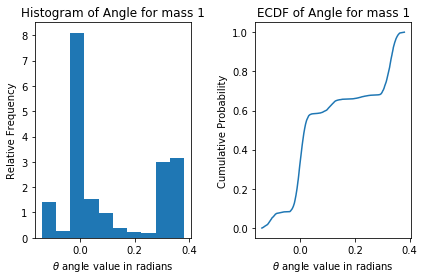

There is strong evidence against the distribution of angles for mass 1 being Gaussian with p-value 0.0 and test statistic 0.414885228798866.




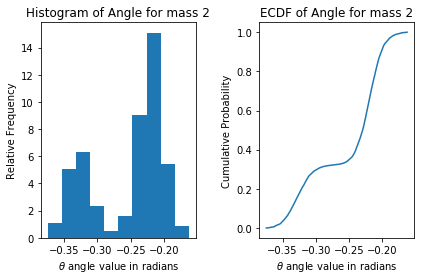

There is strong evidence against the distribution of angles for mass 2 being Gaussian with p-value 0.0 and test statistic 1.0.




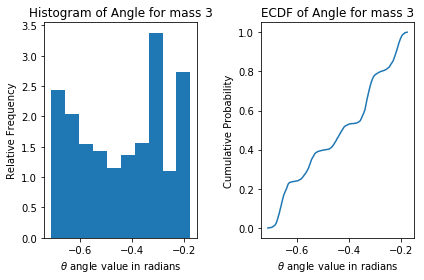

There is strong evidence against the distribution of angles for mass 3 being Gaussian with p-value 0.0 and test statistic 1.0.




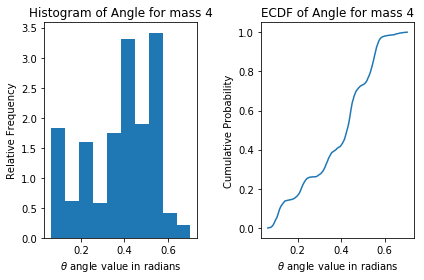

There is strong evidence against the distribution of angles for mass 4 being Gaussian with p-value 0.0 and test statistic 0.9998570439740815.




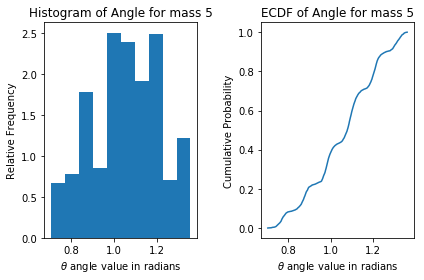

There is strong evidence against the distribution of angles for mass 5 being Gaussian with p-value 0.0 and test statistic 1.0.




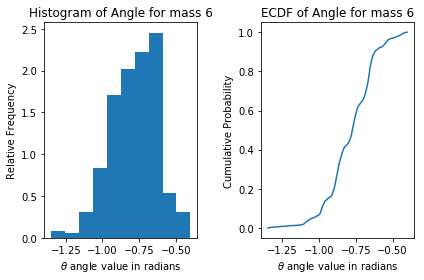

There is strong evidence against the distribution of angles for mass 6 being Gaussian with p-value 0.0 and test statistic 1.0.




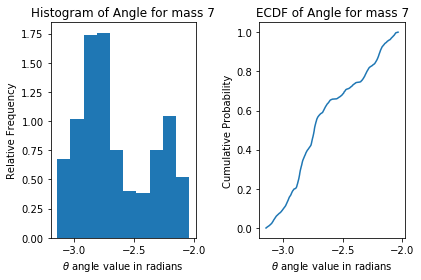

There is strong evidence against the distribution of angles for mass 7 being Gaussian with p-value 0.0 and test statistic 1.0.




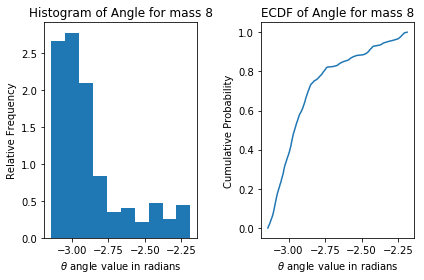

There is strong evidence against the distribution of angles for mass 8 being Gaussian with p-value 0.0 and test statistic 1.0.




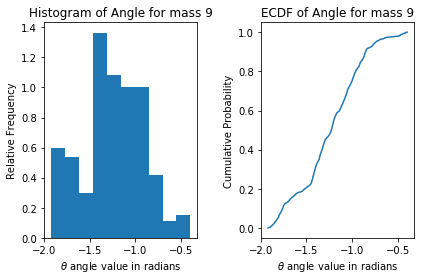

There is strong evidence against the distribution of angles for mass 9 being Gaussian with p-value 0.0 and test statistic 1.0.




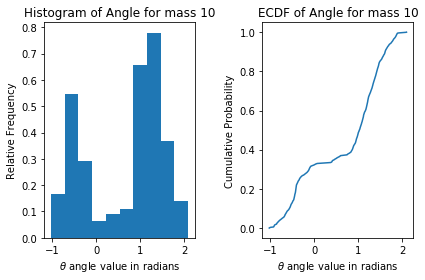

There is strong evidence against the distribution of angles for mass 10 being Gaussian with p-value 0.0 and test statistic 0.6703478613559711.




In [12]:
get_all_plots(ANGLES)

## Statistically Steady State Analysis

### Data
Here, we investigate the property of the system after a prolonged period of time when the system has supposedly calmed down. We look at the 100 time step moving average for each angle for a fixed time interval and compare the evolutions of 100 time step moving averages for each mass' angle.

In [15]:
N = 10
f = Chain(N)
z = f.hanging_state(4, 0.1)
stepper = RK45(f, z)
T, dt, freq = 500000, 0.01, 100

# Variables for moving average.
STEADY_STATE_TIME = 100000
ANGLES_AVERAGE = np.zeros((T-STEADY_STATE_TIME, N)) # Collect all angles.
VELOCITY_AVERAGE = np.zeros((T-STEADY_STATE_TIME, N)) # Collect all velocities.

MA_AVERAGE = 1000 # take 1000 MA
temp_array_angles = np.zeros((MA_AVERAGE, N))
temp_array_velocity = np.zeros((MA_AVERAGE, N))
count = 0

while stepper.iter < T:
    if stepper.iter < MA_AVERAGE:
        # Initial storing of array.
        temp_array_angles[stepper.iter] = f.theta # store last angles.
        temp_array_velocity[stepper.iter] = f.omega
        stepper(dt)
        continue
    
    stepper(dt)
    if stepper.iter % 10000 == 0:
        print(stepper.iter)
    
    # Just made new step so now need to shift over old values and store new one.
    temp_array_angles = np.roll(temp_array_angles, -1)
    temp_array_angles[-1] = f.theta
    
    temp_array_velocity = np.roll(temp_array_velocity, -1)
    temp_array_velocity[-1] = f.omega
    
    if stepper.iter > STEADY_STATE_TIME:
        # Assume we reached statistical steady state.
        # We get the moving average.
        
        ANGLES_AVERAGE[count] = np.mean(temp_array_angles, axis=0)
        VELOCITY_AVERAGE[count] = np.mean(temp_array_velocity, axis=0)
        count += 1

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000


In [16]:
import matplotlib.style as style
style.use('ggplot')

def time_plot_ma(data, starting_time, ma, number, quantity):
    time = range(starting_time, starting_time+data.shape[0])
    plt.plot(time, data)
    plt.xlabel("Time step")
    plt.ylabel(r'{} moving average of {} {}'.format(ma, quantity, number))
    plt.title(r'Evolution of {} time step moving average of the {} of mass {}'.format(ma, quantity, number))
    plt.show()

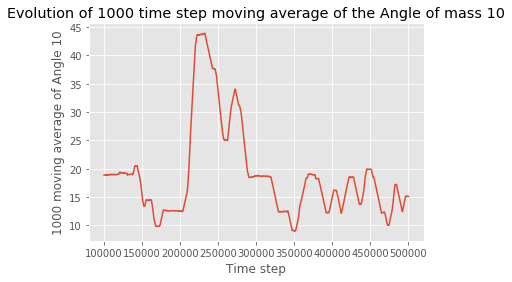

In [17]:
time_plot_ma(ANGLES_AVERAGE[:,9], STEADY_STATE_TIME, MA_AVERAGE, 10, "Angle")

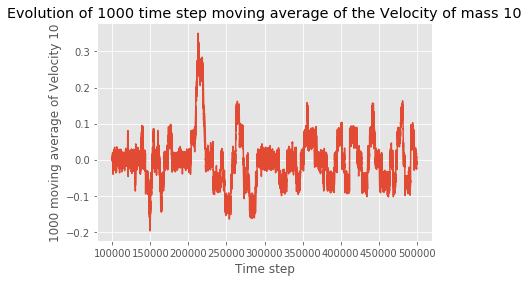

In [18]:
time_plot_ma(VELOCITY_AVERAGE[:,9], STEADY_STATE_TIME, MA_AVERAGE, 10, "Velocity")

### Observations

It is clear hear that there are periodic swings in the 100 time step moving average of the velocity and angle for mass 10.

## Return Time
### Data
We look at the time periods in which the pendulum returns to its initial state, which we define to be the difference of the sum of angles less the sum of the initial angles to be less than a certain threshold. We vary the number of chains in the system to see how does the return time differ.

In [21]:
def plot_return_time(data, T, n):
    """
    Construct a plot to visualise the return times of the pendulum.
    """
    array = np.zeros(T)
    array[data] = 1
    plt.scatter(range(0,T), array)    
    plt.xlabel("Time (dt=0.01)")
    plt.ylabel("Return (binary variable)")
    plt.title("Return times for pendulum with {} masses to return to initial state".format(n))
    plt.show()

In [22]:
def get_return_times(N):
    """
    Constructs a pendulum of size N and records return times.
    """
    f = Chain(N)
    z = f.hanging_state(4, 0.1)
    stepper = RK45(f, z)
    T, dt, freq = 100000, 0.01, 100

    return_time = []

    init_angles = f.theta
    epsilon = 15 #arbitrary

    while stepper.iter < T:

        stepper(dt)

        if abs(np.sum(f.theta - init_angles)) < epsilon:
            return_time.append(stepper.iter)
    
    return return_time

Plotting for 10 masses now ...


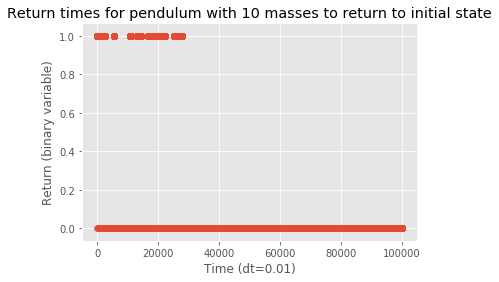

Plotting for 30 masses now ...


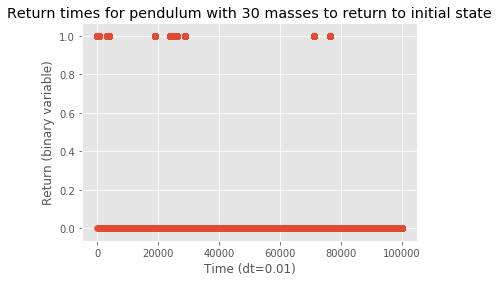

Plotting for 50 masses now ...


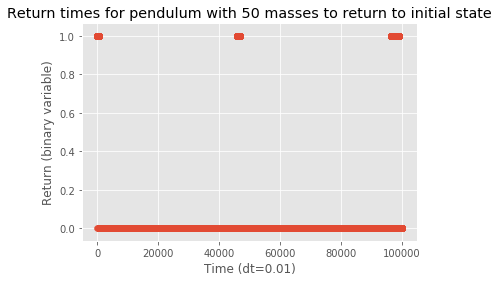

Plotting for 70 masses now ...


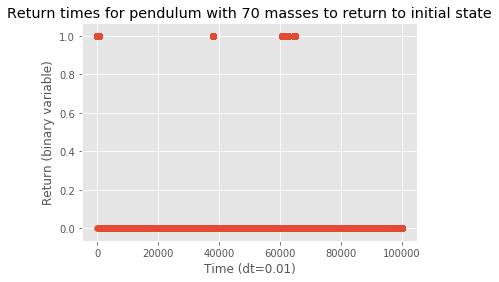

In [23]:
values = [10, 30, 50, 70]
T = 100000
for N in values:
    print("Plotting for {} masses now ...".format(N))
    return_time = get_return_times(N)
    plot_return_time(return_time, T, N)

### Observations
We see that for different number of masses, there is a clear indication of a difference between the systems on whether does the pendulum return back to the initial state multiple times or not. We see that especially for a 10-mass sytem, the system returns back to its initial state numerous times. Furthermore, we note that the first return time for all the systems look like they occur approximately at the same time.